# Investigate ML Data Files (numpy) Normalized and non-Normalized

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import time as t
from time import perf_counter as cput

print("Awkward version: "+str(ak.__version__))
print("Uproot version: "+str(ur.__version__))

Awkward version: 1.5.1
Uproot version: 4.1.8


## Un-normalized Data

In [2]:
datapath_prefix = '/data/atlas/rbate/'

In [3]:
Eta = np.load(datapath_prefix+'Eta_STMC_v2_25_files.npy')
X = np.load(datapath_prefix+'X_STMC_v2_25_files.npy', mmap_mode='r+')
Y = np.load(datapath_prefix+'Y_STMC_v2_25_files.npy', mmap_mode='r+')

print(Eta.shape)
print(X.shape)
print(Y.shape)

(242499,)
(242499, 1175, 6)
(242499, 3)


In [4]:
## Use rPerp as the zero mask
nz_mask = X[:,:,3] != 0
t_mask = X[:,:,4] == 1
nzc_mask = np.logical_and(nz_mask, np.invert(t_mask))
nzt_mask = np.logical_and(nz_mask, t_mask)
print(nzt_mask.shape)

(242499, 1175)


### Event Eta

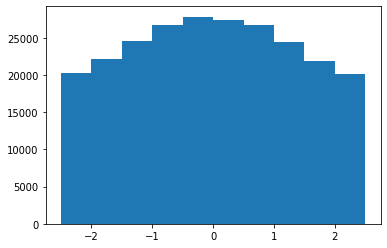

In [5]:
plt.hist(Eta)
plt.show()

### Clusters

#### Cluster Cell Energy

In [6]:
emax = np.max(X[nzc_mask,0])
emin = np.min(X[nzc_mask,0])
print('Max cell energy: {}'.format(emax))
print('Min cell energy: {}'.format(emin))

Max cell energy: 1819.1072998046875
Min cell energy: 0.005000010132789612


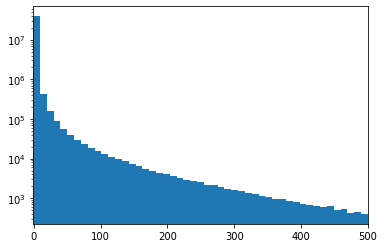

In [7]:
ebins = np.linspace(-1,500,50,endpoint=True)
plt.hist(X[nzc_mask,0], bins=ebins)
plt.xlim(ebins[0], ebins[-1])
plt.yscale('log')
plt.show()

#### Cluster Cell Eta

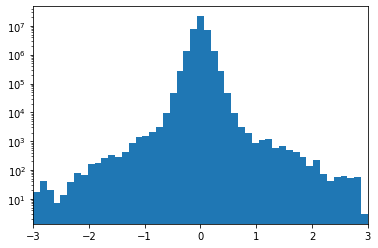

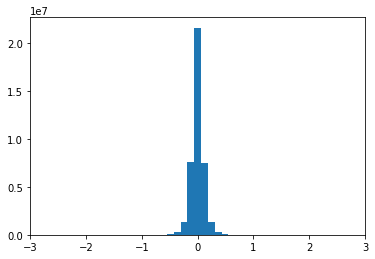

In [8]:
etabins = np.linspace(-3,3,50,endpoint=True)
plt.hist(X[nzc_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
plt.yscale('log')
plt.show()

plt.hist(X[nzc_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
plt.show()

#### Cluster Cell Phi

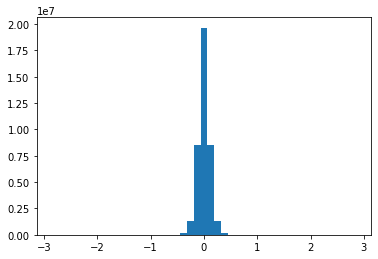

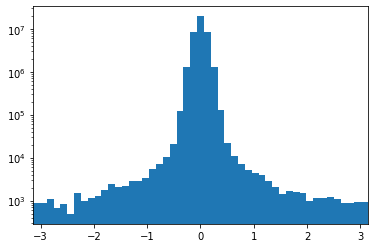

In [9]:
phibins = np.linspace(-np.pi,np.pi,50,endpoint=True)
plt.hist(X[nzc_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
plt.show()

phibins = np.linspace(-np.pi,np.pi,50,endpoint=True)
plt.hist(X[nzc_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
plt.yscale('log')
plt.show()

#### Cluster rPerp

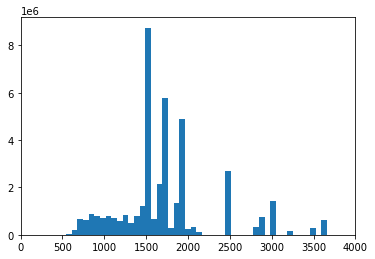

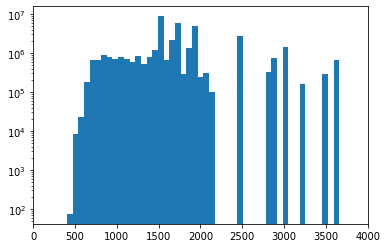

In [10]:
rperpbins = np.linspace(0,4000,60,endpoint=True)
plt.hist(X[nzc_mask,3], bins=rperpbins)
plt.xlim(rperpbins[0], rperpbins[-1])
plt.show()

rperpbins = np.linspace(0,4000,60,endpoint=True)
plt.hist(X[nzc_mask,3], bins=rperpbins)
plt.xlim(rperpbins[0], rperpbins[-1])
plt.yscale('log')
plt.show()

### Tracks

#### Track Projection Number

In [11]:
print(X.shape)
print(nzt_mask.shape)
ntrack = np.sum(X[:,:,4], axis=1)
print('Max number of tracks: {}'.format(np.max(ntrack)))

(242499, 1175, 6)
(242499, 1175)
Max number of tracks: 9.0


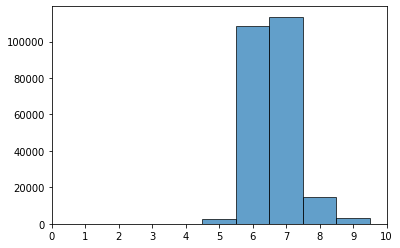

In [12]:
tbins = np.arange(-.5,10.5,1)
plt.hist(ntrack, bins=tbins, edgecolor='black', alpha=.7)
plt.xlim(0,10)
plt.xticks(ticks=range(11), labels=\
          [str(i) for i in range(11)])
plt.show()

In [13]:
event = 1
np.set_printoptions(suppress=True, precision=4)
for i in range(X.shape[1]):
    print(X[event,i,:])

[   0.6589    0.0156   -0.0269 1757.2126    0.        2.    ]
[   0.4668    0.0155   -0.0514 1757.313     0.        2.    ]
[   0.0891    0.0156   -0.0023 1757.1129    0.        2.    ]
[   0.0471   -0.0095   -0.0269 1757.0626    0.        2.    ]
[   0.4336    0.0406   -0.0269 1757.3126    0.        2.    ]
[   0.0748   -0.0095   -0.0514 1757.163     0.        2.    ]
[   0.2919    0.0405   -0.0514 1757.4131    0.        2.    ]
[   0.0311   -0.0094   -0.0023 1756.9629    0.        2.    ]
[   0.0319    0.0406   -0.0023 1757.2129    0.        2.    ]
[   0.1468    0.0048   -0.0149 1542.4253    0.        1.    ]
[   0.1003    0.0079   -0.0149 1542.4253    0.        1.    ]
[   0.105     0.011    -0.0149 1542.4253    0.        1.    ]
[   0.2954    0.0141   -0.0149 1542.4253    0.        1.    ]
[   0.043     0.0173   -0.0149 1542.4253    0.        1.    ]
[   0.015     0.0204   -0.0149 1542.4253    0.        1.    ]
[   0.0161    0.0235   -0.0149 1542.4253    0.        1.    ]
[   0.03

#### Track P

Maximum trackP: 15427740.0


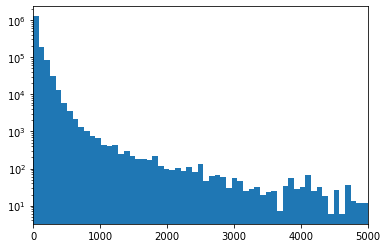

In [14]:
pbins = np.linspace(0,5000,60,endpoint=True)
print('Maximum trackP: {}'.format(np.max(X[nzt_mask,0])))
plt.hist(X[nzt_mask,0], bins=pbins)
plt.xlim(pbins[0], pbins[-1])
plt.yscale('log')
plt.show()

#### Track Eta

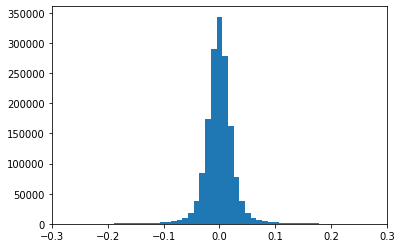

In [15]:
tebins = np.linspace(-.3,.3,60,endpoint=True)

plt.hist(X[nzt_mask,1], bins=tebins)
plt.xlim(tebins[0], tebins[-1])
# plt.yscale('log')
plt.show()

#### Track Phi

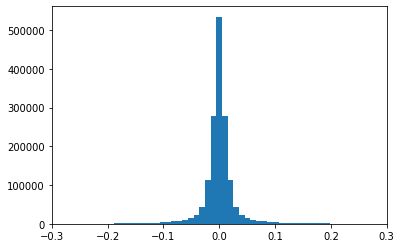

In [16]:
tphbins = np.linspace(-.3,.3,60,endpoint=True)

plt.hist(X[nzt_mask,2], bins=tphbins)
plt.xlim(tphbins[0], tphbins[-1])
# plt.yscale('log')
plt.show()

#### Track rPerp

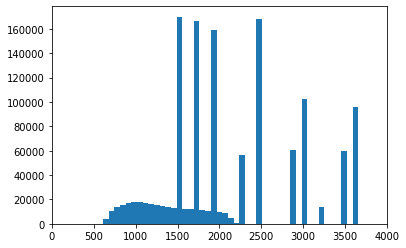

In [17]:
trbins = np.linspace(0,4000,60,endpoint=True)

plt.hist(X[nzt_mask,3], bins=trbins)
plt.xlim(trbins[0], trbins[-1])
# plt.yscale('log')
plt.show()

### Debugging Normalization Script

In [18]:
nz_mask = X[:,:,3] != 0

In [19]:
eta_std = np.std(X[nz_mask,1])
print(eta_std)

0.10781428297577793


## Normalized Data

In [3]:
Eta = np.load('/fast_scratch_1/atlas/Eta_STMC_v2_25_norm.npy')
X = np.load('/fast_scratch_1/atlas/X_STMC_v2_25_norm.npy', mmap_mode='r+')
Y = np.load('/fast_scratch_1/atlas/Y_STMC_v2_25_norm.npy', mmap_mode='r+')

print(Eta.shape)
print(X.shape)
print(Y.shape)

(242499,)
(242499, 1175, 5)
(242499,)


In [4]:
nz_mask = X[:,:,3] != 0

### Energy

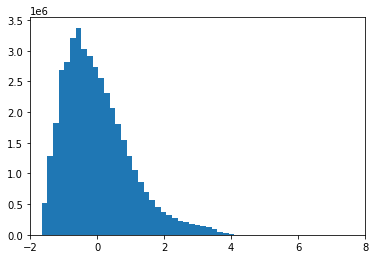

In [5]:
ebins = np.linspace(-2,8,60,endpoint=True)

plt.hist(X[nz_mask,0], bins=ebins)
plt.xlim(ebins[0], ebins[-1])
# plt.yscale('log')
plt.show()

### Eta

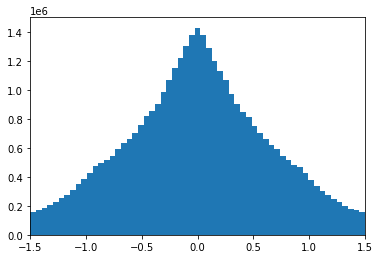

In [7]:
etabins = np.linspace(-1.5,1.5,60,endpoint=True)

plt.hist(X[nz_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
# plt.yscale('log')
plt.show()

### Phi

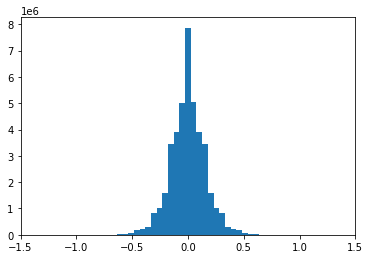

In [8]:
phibins = np.linspace(-1.5,1.5,60,endpoint=True)

plt.hist(X[nz_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
# plt.yscale('log')
plt.show()

### rPerp

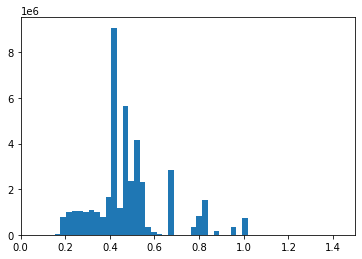

In [9]:
rpbins = np.linspace(0,1.5,60,endpoint=True)

plt.hist(X[nz_mask,3], bins=rpbins)
plt.xlim(rpbins[0], rpbins[-1])
# plt.yscale('log')
plt.show()